## N-grams in Minerva University Responses

In [31]:
import re
import pandas as pd
import unicodedata
import nltk
from nltk.corpus import stopwords
import gensim

import matplotlib.pyplot as plt

In [38]:
# Separating the dataframe by HCs/LOs and grades

def responses_grouped_hclo_grade(df):

    # Get all HCs/LOs list
    df['Poll Responses Response'] = df['Poll Responses Response'].dropna().astype('string').apply(lambda x: gensim.utils.simple_preprocess(x))
    hclo_lst = df['Assessment reports Hashtag'].dropna().unique().tolist()

    # Make a dataframe for each HC/LO
    hclos_dfs = {}
    for hclo in hclo_lst:
        hclos_dfs[hclo] = df.loc[df['Assessment reports Hashtag'] == hclo]


    # Make dataframes for each score of each HC/LO
    hclos_scores_dfs = {}

    for hclo in hclo_lst:
        cur_df = hclos_dfs[hclo]
        hclos_scores_dfs[f'{hclo}_4'] = cur_df.loc[cur_df['Assessment reports Score'] == 4.0]
        hclos_scores_dfs[f'{hclo}_3'] = cur_df.loc[cur_df['Assessment reports Score'] == 3.0]
        hclos_scores_dfs[f'{hclo}_2'] = cur_df.loc[cur_df['Assessment reports Score'] == 2.0]
        hclos_scores_dfs[f'{hclo}_1'] = cur_df.loc[cur_df['Assessment reports Score'] == 1.0]
        
    return hclos_scores_dfs


def ngram_hclo_grade_dataframe(df):
    # Make dataframes for n-grams of the HC/LO responses
    hclos_ngrams = {}
    for key in df.keys():
        hclos_ngrams[f'{key}_bigram'] = (pd.Series(nltk.ngrams(df[key], 2)).value_counts())
        hclos_ngrams[f'{key}_trigram'] = (pd.Series(nltk.ngrams(df[key], 3)).value_counts())
        hclos_ngrams[f'{key}_quadgram'] = (pd.Series(nltk.ngrams(df[key], 4)).value_counts())
        
    return hclos_ngrams




In [43]:
# Stuck on headers
df = pd.read_csv('minerva_university_responses.csv').iloc[1:]
hclo_grade_df = responses_grouped_hclo_grade(df)
hclo_grade_ngrams =  ngram_hclo_grade_dataframe(hclo_grade_df)

KeyboardInterrupt: 

In [41]:
def plot_most_common_bars(hclo, score, n, df):
    if n == 2:
        ngram = 'bigram'
    elif n == 3:
        ngram = 'trigram'
    elif n == 4:
        ngram = 'quadgram'
    else:
        return 'Not supported.'
        
    ngram_key = df[f'{hclo}_{score}_{ngram}']
    ngram_key.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
    plt.title(f'10 Most Frequently Occuring {ngram.capitalize()} in {hclo} {score} Responses')
    plt.ylabel(ngram.capitalize())
    plt.xlabel('# of Occurrences')
    plt.show()

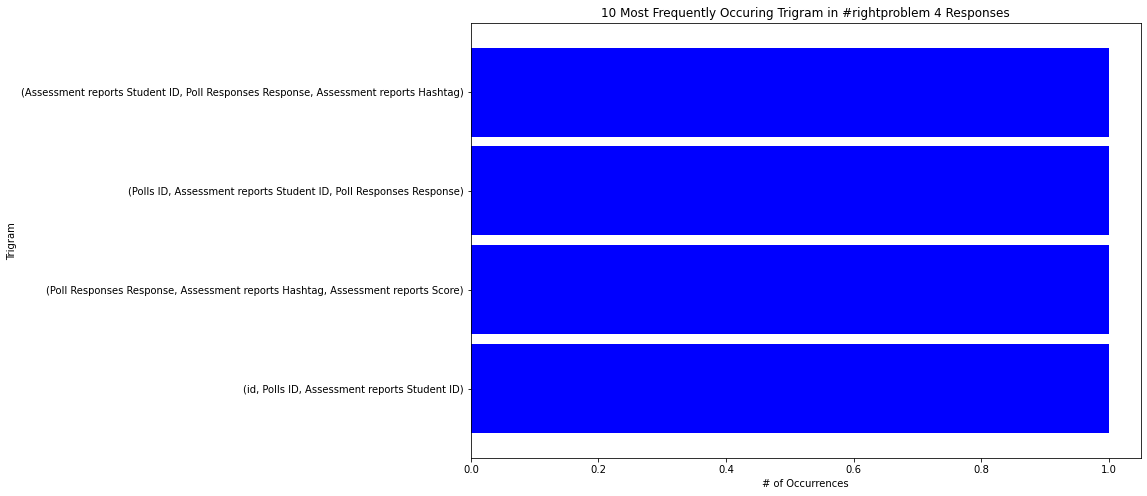

In [42]:
plot_most_common_bars('#rightproblem', 4, 3, hclo_grade_ngrams)

## Things this version is missing:
* Input preprocessing.
